### IMPORTING LIBRARIES

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### PREPROCESSING OF DATA

In [2]:
#Reading the csv files which contains the data
features=pd.read_csv("features.csv")
store=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.isnull().sum()    #to check the missing or null values in dataset

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [5]:
features['MarkDown1'].fillna(value=features['MarkDown1'].mean(), inplace=True)     #handling the missing values
features['MarkDown2'].fillna(value=features['MarkDown2'].mean(), inplace=True)
features['MarkDown3'].fillna(value=features['MarkDown3'].mean(), inplace=True)
features['MarkDown4'].fillna(value=features['MarkDown4'].mean(), inplace=True)
features['MarkDown5'].fillna(value=features['MarkDown5'].mean(), inplace=True)
features['CPI'].fillna(value=features['CPI'].mean(), inplace=True)
features['Unemployment'].fillna(value=features['Unemployment'].mean(), inplace=True)
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [6]:
store.head()
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [7]:
train.head()
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
test.head()
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [9]:
#reseting train
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [10]:
#merging train and feature
df=pd.merge(train,features,on=['Store','Date'],how='inner')
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False


In [11]:
#merging store with data
df=pd.merge(df,store,on=['Store'],how='inner')
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False,A,151315


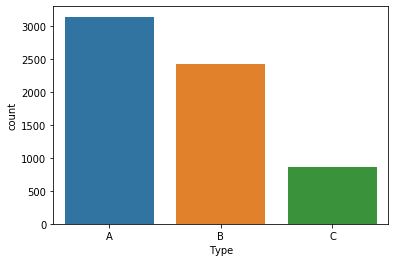

In [12]:
sns.countplot(x="Type", data=df)

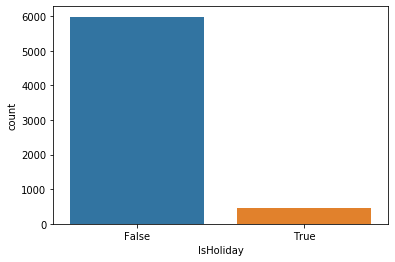

In [13]:
sns.countplot(x="IsHoliday", data=df)

In [15]:
lr=LabelEncoder()
df['IsHoliday']=lr.fit_transform(df.IsHoliday)
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,0,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,1,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,0,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,0,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,0,A,151315


In [16]:
df['Type']=lr.fit_transform(df.Type)
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,0,0,151315
1,1,2010-02-12,1641957.44,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,1,0,151315
2,1,2010-02-19,1611968.17,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,0,0,151315
3,1,2010-02-26,1409727.59,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,0,0,151315
4,1,2010-03-05,1554806.68,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,0,0,151315


### Our third step is to split the data into training and testing part and train our model

In [17]:
#splitting data in input and output
x=df.drop(['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
x.head()


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,0,0,151315
1,1,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,1,0,151315
2,1,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,0,0,151315
3,1,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,0,0,151315
4,1,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,0,0,151315


In [19]:
x_train.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
2887,21,89.65,2.692,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.295141,8.099,0,1,140167
1879,14,79.32,2.808,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,182.380600,8.899,0,0,200898
1154,9,66.09,2.808,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,214.000182,6.384,0,1,125833
119,1,70.33,3.630,6154.140000,3384.176594,45.11000,1675.490000,5508.180000,221.742674,7.143,0,0,151315
1700,12,95.61,3.723,8699.070000,20.000000,0.06000,5542.530000,2781.140000,130.683000,10.926,0,1,112238


In [20]:
x_test.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
5,1,57.79,2.667,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.380643,8.106,0,0,151315
3694,26,52.55,3.899,6622.210000,3384.176594,45.90000,550.470000,2648.760000,138.106581,7.489,0,0,152513
3346,24,39.51,3.752,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,133.736143,8.252,0,0,203819
501,4,81.85,3.570,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,129.066300,5.946,0,0,205863
4411,31,79.24,3.501,10969.380000,3384.176594,378.31000,2706.460000,3236.460000,221.385275,6.891,0,0,203750


In [21]:
y_train.head()

2887     793589.18
1879    2246179.91
1154     485764.32
119     1595901.87
1700     960312.75
Name: Weekly_Sales, dtype: float64

In [22]:
y_test.head()

5       1439541.59
3694     978082.84
3346    1253218.70
501     2008344.92
4411    1404516.29
Name: Weekly_Sales, dtype: float64

LINEAR REGRESSION

In [23]:
LR=LinearRegression(normalize=True)
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
y_pred=LR.predict(x_test)
print(y_pred)

[1236525.24400758 1128592.47682475 1565456.98471496 ...  743505.1807586
  296832.12975074  846858.21983201]


In [25]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

305831.07696796063


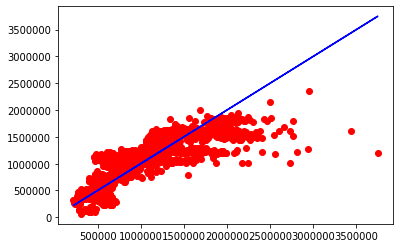

In [26]:
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [27]:
lr_r2=r2_score(y_test,y_pred)
print(lr_r2)

0.7043859727454052


In [28]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [29]:
rmse=np.sqrt(np.mean(np.square(y_test-preds)))
rmse

143985.17984660104

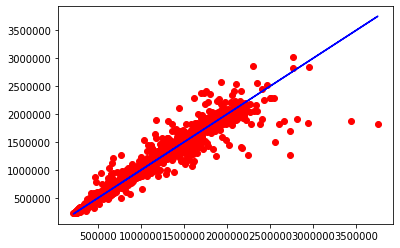

In [30]:
plt.plot(y_test,preds,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [31]:
rfg_r2=r2_score(y_test,preds)
print(rfg_r2)

0.9344764534338694


In [32]:
store=input("Enter Store [1 to 45]: ")
temp=input("Enter Temperature: ")
fuel=input("Enter Fuel Price: ")
Markdown1=input("Enter Markdown1 : ")
Markdown2=input("Enter Markdown2: ")
Markdown3=input("Enter Markdown3: ")
Markdown4=input("Enter Markdown4: ")
Markdown5=input("Enter Markdown5: ")
cpi=input("Enter CPI: ")
un=input("Enter Unemployement: ")
holiday=input("Enter Holiday [0 for False or 1 for True]: ")
ty=input("Enter Type [0 for A,1 for B,2 for C]: ")
size=input("Enter Size: ")




prediction=model.predict([[float(store),
                      float(temp),
                      float(fuel),
                      float(Markdown1),
                      float(Markdown2),
                      float(Markdown3),
                      float(Markdown4),
                      float(Markdown5),
                      float(cpi),
                      float(un),
                      float(holiday),
                      float(ty),
                      float(size) ]])
print(prediction)

Enter Store [1 to 45]: 1
Enter Temperature: 1
Enter Fuel Price: 1
Enter Markdown1 : 1
Enter Markdown2: 1
Enter Markdown3: 1
Enter Markdown4: 1
Enter Markdown5: 1
Enter CPI: 1
Enter Unemployement: 1
Enter Holiday [0 for False or 1 for True]: 1
Enter Type [0 for A,1 for B,2 for C]: 1
Enter Size: 1
[251269.855]


# GUI


In [33]:
from tkinter import *
from tkinter import ttk

In [34]:
root=Tk()
root.title("walmart")
root.geometry("950x650")
root.configure()
var=StringVar()
label=Label(root,textvariable=var,font=('arial',20,'bold'),bd=20)
var.set("WALMART SALES PREDICTION")
label.grid(row=0,columnspan=6)

label_0=ttk.Label(root,text='Enter Store[1 to 45]: ',font=("Helvetica",16))
label_0.grid(row=10,column=0)
Entry_0=Entry(root)
Entry_0.grid(row=10,column=1)


label_1=ttk.Label(root,text='Enter Temperature: ',font=("Helvetica",16))
label_1.grid(row=11,column=0)
Entry_1=Entry(root)
Entry_1.grid(row=11,column=1)

label_2=ttk.Label(root,text='Enter Fuel Price: ',font=("Helvetica",16))
label_2.grid(row=12,column=0)
Entry_2=Entry(root)
Entry_2.grid(row=12,column=1)

label_3=ttk.Label(root,text='Enter Markdown1 : ',font=("Helvetica",16))
label_3.grid(row=13,column=0)
Entry_3=Entry(root)
Entry_3.grid(row=13,column=1)

label_4=ttk.Label(root,text='Enter Markdown2 : ',font=("Helvetica",16))
label_4.grid(row=14,column=0)
Entry_4=Entry(root)
Entry_4.grid(row=14,column=1)

label_5=ttk.Label(root,text='Enter Markdown3 : ',font=("Helvetica",16))
label_5.grid(row=15,column=0)
Entry_5=Entry(root)
Entry_5.grid(row=15,column=1)

label_6=ttk.Label(root,text='Enter Markdown4 : ',font=("Helvetica",16))
label_6.grid(row=16,column=0)
Entry_6=Entry(root)
Entry_6.grid(row=16,column=1)

label_7=ttk.Label(root,text='Enter Markdown5 : ',font=("Helvetica",16))
label_7.grid(row=17,column=0)
Entry_7=Entry(root)
Entry_7.grid(row=17,column=1)

label_8=ttk.Label(root,text='Enter CPI: ',font=("Helvetica",16))
label_8.grid(row=18,column=0)
Entry_8=Entry(root)
Entry_8.grid(row=18,column=1)

label_9=ttk.Label(root,text='Enter Unemployement: ',font=("Helvetica",16))
label_9.grid(row=19,column=0)
Entry_9=Entry(root)
Entry_9.grid(row=19,column=1)

label_10=ttk.Label(root,text='Enter Holiday [0 for False or 1 for True]: ',font=("Helvetica",16))
label_10.grid(row=20,column=0)
Entry_10=Entry(root)
Entry_10.grid(row=20,column=1)

label_11=ttk.Label(root,text='Enter Type [0 for A,1 for B,2 for C]: ',font=("Helvetica",16))
label_11.grid(row=21,column=0)
Entry_11=Entry(root)
Entry_11.grid(row=21,column=1)

label_12=ttk.Label(root,text='Enter Size: ',font=("Helvetica",16))
label_12.grid(row=22,column=0)
Entry_12=Entry(root)
Entry_12.grid(row=22,column=1)

def predict():
    store=Entry_0.get()
    temp=Entry_1.get()
    fuel=Entry_2.get()
    Markdown1=Entry_3.get()
    Markdown2=Entry_4.get()
    Markdown3=Entry_5.get()
    Markdown4=Entry_6.get()
    Markdown5=Entry_7.get()
    cpi=Entry_8.get()
    un=Entry_9.get()
    holiday=Entry_10.get()
    ty=Entry_11.get()
    size=Entry_12.get()
    out=model.predict([[float(store),
                      float(temp),
                      float(fuel),
                      float(Markdown1),
                      float(Markdown2),
                      float(Markdown3),
                      float(Markdown4),
                      float(Markdown5),
                      float(cpi),
                      float(un),
                      float(holiday),
                      float(ty),
                      float(size)]])
    
    
    output.delete(0,END)
    output.insert(0,out)
    
    
    
b1=Button(root,text="Predict", font=("Helvetica",20,'bold'),command=predict)
b1.grid(row=30,column=0)

output=Entry(root,font=("Helvetica",20,'bold'))
output.grid(row=30,column=1)
root.mainloop()